In [85]:

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)

In [86]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


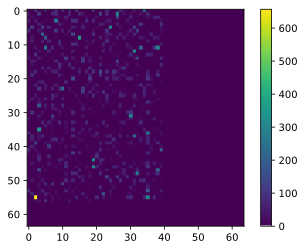

In [87]:
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
Vgate = 5.0
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            Gmap0[rr,cc] = 1e6*a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead

plt.imshow(Gmap0)
plt.colorbar()

Running <function DPE.read at 0x108FCC00> with serial
[INFO] Elapsed time = 0.27s
Serial disconnected


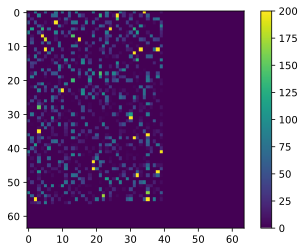

In [29]:
plt.imshow(1e6*dpe.read(0), clim=[0, 200])
plt.colorbar()

Running <function DPE.read at 0x108FCC00> with serial
[INFO] Elapsed time = 0.28s
Serial disconnected


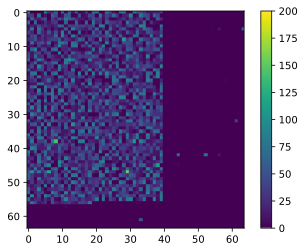

In [25]:
plt.imshow(1e6*dpe.read(2), clim=[0, 200])
plt.colorbar()

Running <function DPE.read at 0x108FCC00> with serial
[INFO] Elapsed time = 0.27s
Serial disconnected


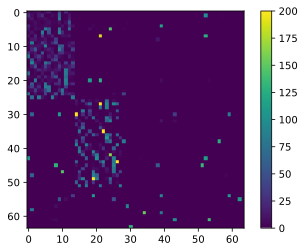

In [24]:
plt.imshow(1e6*dpe.read(1), clim=[0, 200])
plt.colorbar()

In [77]:
load_workspace(vars(), '20190821-051552-mnist_xs')

# load_workspace(vars(), 'mnist_xs_software')
xs = np.array(xs)
# Check xs 
acc = []

for img_idx in range(len(test_images)):
    x1 = xs[img_idx]
    y = nn.dense(x1)
    
    if (img_idx+1)%100 == 0:
        display.clear_output(wait=True)

        print(f'idx={img_idx}, predicted: {y.argmax()}, label: {test_labels[img_idx]}')
        acc.append( y.argmax() == test_labels[img_idx] )
        print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
        

idx=9999, predicted: 6, label: 6
	 Accuracy = 98.00%


In [78]:
xs = np.concatenate((xs, np.ones((xs.shape[0], 1))), axis=1)

import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGfc.mat')
finalGfc = mat_contents['finalGfc']

x = xs[0:400]

x1 = x[:,:57].T
x2 = x[:,57:].T

sc1 = x1.max()
sc2 = x2.max()

Gfc1 = finalGfc[:57]
Gfc2 = finalGfc[57:]

x1 = x1 / sc1
x2 = x2 / sc2

dpe.N_BIT = 64

output1 = dpe.multiply_w_delay(0, x1, c_sel=[0, 20], mode=0, delay=1, debug=True)
software1 = (Gfc1.T @ x1).T 

output2 = dpe.multiply_w_delay(0, x2, c_sel=[20, 40], mode=1, delay=1, debug=True)
software2 = (Gfc2.T @ x2).T

Running <function DPE.multiply_w_delay at 0x108FCED0> with serial
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 100
[DEBUG] processing vector 150
[DEBUG] processing vector 200
[DEBUG] processing vector 250
[DEBUG] processing vector 300
[DEBUG] processing vector 350
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 100
[DEBUG] processing vector 150
[DEBUG] processing vector 200
[DEBUG] processing vector 250
[DEBUG] processing vector 300
[DEBUG] processing vector 350
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 100
[DEBUG] processing vector 150
[DEBUG] processing vector 200
[DEBUG] processing vector 250
[DEBUG] processing vector 300
[DEBUG] processing vector 350
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 100
[DEBUG] processing vector 150
[DEBUG] processing vector 200
[DEBUG] processing vector 250
[DEBUG] processing vector 300
[DEBUG] processi

In [79]:
lin_cor_fc1 = []
lin_cor_fc2 = []
for c in range(20):
    lin_cor_fc1.append( np.polyfit(output1[:,c], software1[:,c], 1))
    lin_cor_fc2.append( np.polyfit(output2[:,c], software2[:,c], 1))

In [80]:
def lin_corr(outputs, factors):
    result = np.zeros(outputs.shape)
    for c in range(outputs.shape[1]):
        result[:,c] = outputs[:,c] * factors[c][0] + factors[c][1]
        
    return result


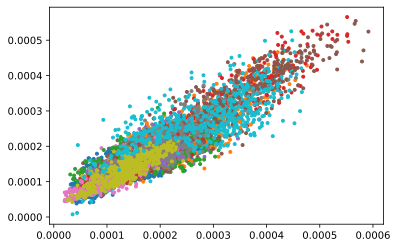

In [81]:
output_corr = lin_corr(output2, lin_cor_fc2)
software = (Gfc2.T @ x2).T 

for c in range(20):
    x = software[:,c]
    y = output_corr[:,c]
    
#     plt.figure(c)
    plt.plot(x,y,'.')


(array([  2.,   0.,   0.,   2.,   1.,   3.,   7.,   4.,   6.,  12.,  27.,
         31.,  43.,  43.,  92.,  94., 123., 162., 217., 262., 345., 427.,
        509., 555., 644., 665., 657., 635., 522., 488., 405., 298., 224.,
        157., 101.,  95.,  51.,  30.,  19.,   9.,   9.,   8.,   2.,   8.,
          1.,   1.,   2.,   0.,   1.,   1.]),
 array([-0.31231175, -0.30000915, -0.28770654, -0.27540394, -0.26310133,
        -0.25079873, -0.23849612, -0.22619352, -0.21389091, -0.20158831,
        -0.1892857 , -0.1769831 , -0.16468049, -0.15237789, -0.14007529,
        -0.12777268, -0.11547008, -0.10316747, -0.09086487, -0.07856226,
        -0.06625966, -0.05395705, -0.04165445, -0.02935184, -0.01704924,
        -0.00474663,  0.00755597,  0.01985858,  0.03216118,  0.04446379,
         0.05676639,  0.069069  ,  0.0813716 ,  0.09367421,  0.10597681,
         0.11827942,  0.13058202,  0.14288462,  0.15518723,  0.16748983,
         0.17979244,  0.19209504,  0.20439765,  0.21670025,  0.22900286,
 

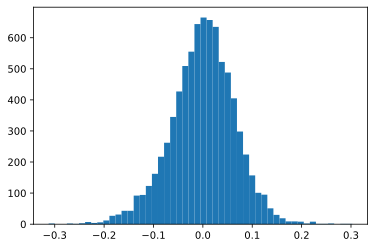

In [82]:
plt.hist((output_corr-software).reshape(-1, 1)/0.0006, bins=50 )

In [83]:
ys = []
batch_size = 100

for i in range( (len(test_images)-1)//batch_size + 1 ):
    idx1 = i * batch_size
    idx2 = (i+1) * batch_size
    idx2 = idx2 if idx2<= len(test_images) else len(test_images)
    
    print(f'Running on sample {idx1}-{idx2}')

    x = xs[idx1:idx2]

    x1 = x[:,:57].T
    x2 = x[:,57:].T

    sc1 = x1.max()
    sc2 = x2.max()

    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]

    x1 = x1 / sc1
    x2 = x2 / sc2
    
    output1  = dpe.multiply_w_delay(0, x1, c_sel=[0, 20], mode=1, debug=True, delay=1)
    output1 = lin_corr(output1, lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, x2, c_sel=[20, 40], mode=1, debug=True, delay=1)
    output2 = lin_corr(output2, lin_cor_fc2) * sc2

    outputs = output1 + output2
    
    y = outputs[:,::2] - outputs[:,1::2]
    
    display.clear_output(wait=True)
    
    print(f'Accuracy = {np.mean(y.argmax(axis=1) == test_labels[idx1:idx2])*100:.2f}%')
    ys.append(y)
    print(f'Total accuracy = {np.mean(np.concatenate(ys).argmax(axis=1) == test_labels[:idx2])*100:.2f}%')
    
ys = np.concatenate(ys)  

Accuracy = 42.00%
Total accuracy = 44.03%


In [84]:
np.mean(ys.argmax(axis=1) == test_labels)

0.4403

In [10]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [11]:
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
import matplotlib

dpe = DPE('COM6')
dpe.set_clock(50)

Running <function DPE.init_dut at 0x108FCA50> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[INFO] Elapsed time = 0.03s
Serial disconnected
Running <function DPE.set_clock at 0x108FCB70> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected


Load various data
--

In [12]:
# Load the offline trained weights
# And the MNIST dataset
load_workspace(vars(), 'dataset/20190815-132601-weights')
load_workspace(vars(), 'dataset/mnist')

# Load the target conductane for linear correction
import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGconv.mat')
finalGconv = mat_contents['finalGconv']

Loaded: weights, 
Loaded: train_images, train_labels, test_images, test_labels, 


Neural network model
--
Set the binarzation bits

In [13]:
nn = NN_dpe(weights)
dpe.N_BIT = 8

In [14]:
img_idx = 1

image = test_images[img_idx]
vectors = nn._conv_flattern(image)

# normalize
vectors /= np.abs(vectors).max()
output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
soft_output = (finalGconv.T @ vectors).T / (nn.Gratio/2)

Running <function DPE.multiply at 0x108FCE40> with serial
[INFO] Elapsed time = 1.60s
Serial disconnected


In [15]:
lin_cor_conv = []
for c in range(14):
    lin_cor_conv.append( np.polyfit(output[:,c], soft_output[:,c], 1))

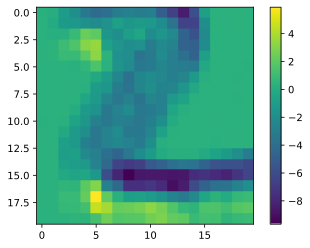

In [26]:
output_cor = dpe.lin_corr(output, lin_cor_conv)

# for c in range(14):
#     x = soft_output[:,c]
#     y = output_cor[:,c]
    
#     plt.plot(x,y,'.')
    
x = output_cor[:,::2] - output_cor[:,1::2]

x = x.reshape(20,20,-1)

plt.imshow(x[:,:,2])
plt.colorbar()

Software fully connected layer
--

In [27]:
x1 = nn.relu(x)
x1 = nn.max_pooling(x1)
x1 = nn.flattern(x1)
y = nn.dense(x1)

print(y)
print(y.argmax())

[-16.8934817  -11.48051207   6.95406544  -8.24559074 -35.8079991
 -18.81381562  -9.11971521 -38.19948413 -10.83616696 -44.56318107]
2


Accuracy test (experimental convolution)
--


KeyboardInterrupt: 

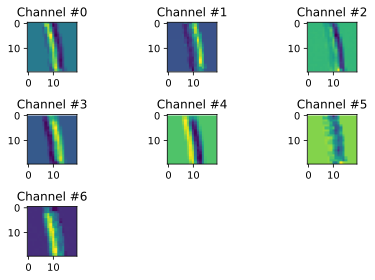

In [28]:
acc = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]

    x = x.reshape(20,20,-1)
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
    
    # Software fully connect
    y = nn.dense(x1)
    
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
    fig = plt.figure(1)
    for ii in range(7):
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(x[:,:,ii])
#         plt.colorbar()
    plt.tight_layout()
    display.display(fig)
    
    
    print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1


For hardware dense (fully connect) layer, refer to 'testbench_wk5_4_prober2_unary' notebook
--

In [75]:
acc = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]

    x = x.reshape(20,20,-1)
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
        
    # Software fully connect
    #y = nn.dense(x1)
    
    ## Start Hardware Fully Connect
    print(np.shape(x1))    
    x = x1
    
    #x1 = x[:,:57].T
    #x2 = x[:,57:].T
    x1 = x[:57].T
    x2 = x[57:].T


    sc1 = x1.max()
    sc2 = x2.max()

    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]

    x1 = x1 / sc1
    x2 = x2 / sc2
    
    x1 = x1[x1 >= 0]
    x2 = x2[x2 >= 0]
    print(np.shape(x1)) 
    print(np.shape(x2)) 
    newX1 = x1.reshape(-1,1)
    newX2 = x2.reshape(-1,1)
    #break
    output1  = dpe.multiply_w_delay(0, newX1, c_sel=[0, 20], mode=1, debug=True, delay=1)
    output1 = lin_corr(output1, lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, newX2, c_sel=[20, 40], mode=1, debug=True, delay=1)
    output2 = lin_corr(output2, lin_cor_fc2) * sc2

    outputs = output1 + output2
    
    y = outputs[:,::2] - outputs[:,1::2]
    
    ## End Hardware Fully Connect
    
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
    fig = plt.figure(1)
    for ii in range(7):
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(x[:,:,ii])
#         plt.colorbar()
    plt.tight_layout()
    display.display(fig)
    
    
    print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1
    if (i >= 3):
        break
        

Running <function DPE.multiply at 0x108FCE40> with serial
[INFO] Elapsed time = 1.77s
Serial disconnected
(112,)
(57,)
(55,)
Running <function DPE.multiply_w_delay at 0x108FCED0> with serial
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[DEBUG] processing vector 0
[INFO] Elapsed time = 0.09s
Serial disconnected


NameError: name 'lin_corr' is not defined

In [71]:
print(x1)

[ 0.44744533 -0.          0.69197584  0.22484904  0.72838911  0.44308536
 -0.          0.30001803  0.11447361  0.17104769  0.44708377 -0.
  0.00344969  0.10825866  0.00568435 -0.          0.16957385  0.24668354
 -0.          0.00344969 -0.         -0.          0.24282806  0.17832228
  0.35036212 -0.          0.00344969 -0.         -0.         -0.
  1.         -0.          0.52161202  0.35912055  0.56895783 -0.
 -0.          0.81572436 -0.         -0.          0.5958832   0.71777487
  0.21851262 -0.          0.70677194  0.10550366  0.87666976  0.88665837
  0.94850374  0.09225845  0.76452122  0.16179573  0.3595715  -0.
  0.25032078  0.95239028 -0.        ]


In [34]:
acc = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]

    print('Initial Size of X is', np.shape(x))
    x = x.reshape(20,20,-1)
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
    
    print('Final Size of X1 is', np.shape(x1))
    # Software fully connect
    y = nn.dense(x1)
        
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
#    fig = plt.figure(1)
    #for ii in range(7):
    #    plt.subplot('33' + str(ii+1))
    #    plt.title('Channel #' + str(ii))
    #    plt.imshow(x[:,:,ii])
##         plt.colorbar()
#    plt.tight_layout()
#    display.display(fig)
    
    
    #print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    #print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1
    if (i >= 3):
        break
        

Running <function DPE.multiply at 0x108FCE40> with serial
[INFO] Elapsed time = 1.74s
Serial disconnected
Initial Size of X is (400, 7)
Final Size of X1 is (112,)


In [45]:
np.shape(x1)

(112,)

In [72]:
aa = np.random.randint(2, size=(1,57))
#print(aa)
output1  = dpe.multiply_w_delay(0, aa, c_sel=[0, 20], mode=1, debug=True, delay=1)

Running <function DPE.multiply_w_delay at 0x108FCED0> with serial
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[INFO] Elapsed time = 0.79s
Serial disconnected


In [73]:
print(output1)
print(np.shape(output1))

[[1.16324536e-06 0.00000000e+00 7.28739003e-05 ... 0.00000000e+00
  0.00000000e+00 8.55327468e-05]
 [1.17607527e-06 0.00000000e+00 7.30449658e-05 ... 0.00000000e+00
  0.00000000e+00 8.57038123e-05]
 [1.17607527e-06 0.00000000e+00 7.31304985e-05 ... 0.00000000e+00
  0.00000000e+00 8.60459433e-05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.18035191e-06 0.00000000e+00 7.24890029e-05 ... 0.00000000e+00
  0.00000000e+00 8.61314761e-05]]
(57, 20)
